# 第5章: 係り受け解析
日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [1]:
import CaboCha

article = 'ai/ai.ja.txt'
output = 'ai.ja.txt.parsed'

cabocha = CaboCha.Parser()

with open(article, 'r', encoding='utf-8') as f:
    l_strip = [s.strip() for s in f.readlines() if s != '\n']

with open(output, mode='w', encoding='utf-8') as f:
    for each_line in l_strip:
        for each_sentence in each_line.split("。"):
            f.write(cabocha.parse(each_sentence).toString(CaboCha.FORMAT_LATTICE))

## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [2]:
class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1

In [3]:
import csv

with open(output, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    l_morpheme = [row for row in reader]

morph_article, morph_sentence = [], []

for each_morpheme in l_morpheme:
    
    if len(each_morpheme) > 1:
        
        morph = Morph(surface=each_morpheme[0].split('\t')[0],
                      base=each_morpheme[6], pos=each_morpheme[0].split('\t')[1],
                      pos1=each_morpheme[1])
        
        morph_sentence.append(morph)
        
    elif each_morpheme[0] == 'EOS':
        morph_article.append(morph_sentence)
        morph_sentence = []

for each_morph in morph_article[1]:
    print('表層形\t: {}'.format(each_morph.surface))
    print('基本形\t: {}'.format(each_morph.base))
    print('品詞\t: {}'.format(each_morph.pos))
    print('細分類1\t: {}'.format(each_morph.pos1))
    print()

表層形	: 人工
基本形	: 人工
品詞	: 名詞
細分類1	: 一般

表層形	: 知能
基本形	: 知能
品詞	: 名詞
細分類1	: 一般

表層形	: （
基本形	: （
品詞	: 記号
細分類1	: 括弧開

表層形	: じん
基本形	: じん
品詞	: 名詞
細分類1	: 一般

表層形	: こうち
基本形	: こうち
品詞	: 名詞
細分類1	: 一般

表層形	: のう
基本形	: のう
品詞	: 助詞
細分類1	: 終助詞

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: AI
基本形	: *
品詞	: 名詞
細分類1	: 一般

表層形	: 〈
基本形	: 〈
品詞	: 記号
細分類1	: 括弧開

表層形	: エーアイ
基本形	: *
品詞	: 名詞
細分類1	: 固有名詞

表層形	: 〉
基本形	: 〉
品詞	: 記号
細分類1	: 括弧閉

表層形	: ）
基本形	: ）
品詞	: 記号
細分類1	: 括弧閉

表層形	: と
基本形	: と
品詞	: 助詞
細分類1	: 格助詞

表層形	: は
基本形	: は
品詞	: 助詞
細分類1	: 係助詞

表層形	: 、
基本形	: 、
品詞	: 記号
細分類1	: 読点

表層形	: 「
基本形	: 「
品詞	: 記号
細分類1	: 括弧開

表層形	: 『
基本形	: 『
品詞	: 記号
細分類1	: 括弧開

表層形	: 計算
基本形	: 計算
品詞	: 名詞
細分類1	: サ変接続

表層形	: （
基本形	: （
品詞	: 記号
細分類1	: 括弧開

表層形	: ）
基本形	: ）
品詞	: 記号
細分類1	: 括弧閉

表層形	: 』
基本形	: 』
品詞	: 記号
細分類1	: 括弧閉

表層形	: という
基本形	: という
品詞	: 助詞
細分類1	: 格助詞

表層形	: 概念
基本形	: 概念
品詞	: 名詞
細分類1	: 一般

表層形	: と
基本形	: と
品詞	: 助詞
細分類1	: 並立助詞

表層形	: 『
基本形	: 『
品詞	: 記号
細分類1	: 括弧開

表層形	: コンピュータ
基本形	: コンピュータ
品詞	: 名詞
細分類1	: 一般

表

## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
class Chunk:
    def __init__(self):
        self.morphs = []
        self.dst = -1
        self.srcs = []

In [5]:
def addMorphs(chunks, morphs):
    if len(morphs) > 0:
        chunks[-1].morphs = morphs
        morphs = []
        
    return chunks, morphs

article_chunks, chunks, morphs = [], [], []
dst_srcs_dict = {}

for each_morpheme in l_morpheme:
    splitted_zero = each_morpheme[0].split()
    
    if splitted_zero[0] == '*':
        chunk = Chunk()
        dst = int(splitted_zero[2][:-1])
        src = int(splitted_zero[1])
        
        if dst in dst_srcs_dict.keys():
            dst_srcs_dict[dst].append(src)
        else:
            dst_srcs_dict[dst] = [src]
        
        chunk.dst = dst
        chunks, morphs = addMorphs(chunks, morphs)
        chunks.append(chunk)
    
    elif splitted_zero[0] == 'EOS':
        # 直前の chunk に morphs を足す
        chunks, morphs = addMorphs(chunks, morphs)
        assert morphs == []
        
        for dst in [i for i in dst_srcs_dict.keys() if i > -1]:
            chunks[dst].srcs = dst_srcs_dict[dst]
        
        article_chunks.append(chunks)
        chunks = []
        dst_srcs_dict = {}
        
    else:
        morphs.append(Morph(surface=each_morpheme[0].split('\t')[0],
                      base=each_morpheme[6], pos=each_morpheme[0].split('\t')[1],
                      pos1=each_morpheme[1])
                      )

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [6]:
import re

stopwords = r'。|．|、|，|「|」|『|』|（|）|\(|\)|・|\/|／|〈|〉'
pattern = re.compile(stopwords)

def removeStopwords(surfaces):
    print(','.join([pattern.sub('', surface) for surface in surfaces]))

for chunks in article_chunks:
    for dst, chunk in enumerate(chunks):
        if chunk.srcs != []:
            
            print('【係り元】', end='')
            src_surfaces = []
            for src in chunk.srcs:
                src_chunks = []
                for surface in [morph.surface for morph in chunks[src].morphs]:
                    src_chunks.append(surface)
                src_surfaces.append(''.join(src_chunks))
            removeStopwords(src_surfaces)
            
            print('【係り先】', end='')
            removeStopwords([''.join(morph.surface for morph in chunks[dst].morphs)])
                
            print()

【係り元】AI
【係り先】エーアイとは

【係り元】計算
【係り先】という

【係り元】コンピュータ
【係り先】という

【係り元】という,概念と,という
【係り先】道具を

【係り元】道具を
【係り先】用いて

【係り元】用いて,知能を
【係り先】研究する

【係り元】研究する
【係り先】計算機科学

【係り元】計算機科学
【係り先】の

【係り元】の
【係り先】一分野を

【係り元】一分野を
【係り先】指す

【係り元】人工知能,じんこうちのう,エーアイとは,指す
【係り先】語

【係り元】言語の,理解や
【係り先】推論

【係り元】推論
【係り先】問題解決などの

【係り元】問題解決などの
【係り先】知的行動を

【係り元】知的行動を,人間に
【係り先】代わって

【係り元】代わって,コンピューターに
【係り先】行わせる

【係り元】行わせる
【係り先】技術または

【係り元】計算機
【係り先】コンピュータによる

【係り元】コンピュータによる,知的な
【係り先】情報処理システムの

【係り元】情報処理システムの,設計や
【係り先】実現に関する

【係り元】技術または,実現に関する
【係り先】研究分野とも

【係り元】研究分野とも
【係り先】される

【係り元】日本大百科全書ニッポニカの
【係り先】解説で

【係り元】情報工学者通信工学者の
【係り先】佐藤理史は

【係り元】解説で,佐藤理史は,次のように
【係り先】述べている

【係り元】人間の
【係り先】知的能力を

【係り元】知的能力を,コンピュータ上で
【係り先】実現する

【係り元】実現する,様々な
【係り先】技術ソフトウェアコンピュータシステム

【係り元】自然言語処理
【係り先】機械翻訳かな漢字変換構文解析等

【係り元】機械翻訳かな漢字変換構文解析等
【係り先】専門家の

【係り元】専門家の
【係り先】推論判断を

【係り元】推論判断を
【係り先】模倣する

【係り元】模倣する
【係り先】エキスパートシステム

【係り元】画像データを
【係り先】解析して

【係り元】特定の
【係り先】パターンを

【係り元】解析して,パターンを
【係り先】検出抽出したりする

【係り元】エキスパートシステム,検出抽出したりする
【係り先】画像認識等が

【係り元】応用例は,画像認識等が
【係り先】ある

【係り

## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [7]:
import re
stopwords = r'。|．|、|，|「|」|『|』|（|）|\(|\)|・|\/|／|〈|〉'
pattern = re.compile(stopwords)

def removeStopwords(surfaces):
    if type(surfaces) == list:
        print(','.join([pattern.sub('', surface) for surface in surfaces]))
    elif str:
        print(''.join([pattern.sub('', surface) for surface in surfaces]))

for chunks in article_chunks:
    for dst, chunk in enumerate(chunks):
        if chunk.srcs != []:
            src_surfaces = []
            src_surfaces_postags = []
            
            for src in chunk.srcs:
                src_chunks = []
                src_postags = []
                for morph in chunks[src].morphs:
                    src_chunks.append(morph.surface)
                    src_postags.append(morph.pos)
                src_surfaces.append(''.join(src_chunks))
                src_surfaces_postags.append(src_postags)
            
            for morph in chunks[dst].morphs:
                if morph.pos == '動詞':
                    
                    for i, each_postag in enumerate(src_surfaces_postags):
                        if '名詞' in each_postag:
                            print('【係り元】', end='')
                            removeStopwords(src_surfaces[i])
                            print('【係り先】', end='')
                            removeStopwords(morph.surface)
                            print()

【係り元】道具を
【係り先】用い

【係り元】知能を
【係り先】する

【係り元】一分野を
【係り先】指す

【係り元】知的行動を
【係り先】代わっ

【係り元】人間に
【係り先】代わっ

【係り元】コンピューターに
【係り先】行わ

【係り元】コンピューターに
【係り先】せる

【係り元】研究分野とも
【係り先】さ

【係り元】研究分野とも
【係り先】れる

【係り元】解説で
【係り先】述べ

【係り元】佐藤理史は
【係り先】述べ

【係り元】次のように
【係り先】述べ

【係り元】解説で
【係り先】いる

【係り元】佐藤理史は
【係り先】いる

【係り元】次のように
【係り先】いる

【係り元】知的能力を
【係り先】する

【係り元】コンピュータ上で
【係り先】する

【係り元】推論判断を
【係り先】する

【係り元】画像データを
【係り先】し

【係り元】解析して
【係り先】し

【係り元】パターンを
【係り先】し

【係り元】解析して
【係り先】する

【係り元】パターンを
【係り先】する

【係り元】応用例は
【係り先】ある

【係り元】画像認識等が
【係り先】ある

【係り元】1956年に
【係り先】さ

【係り元】ダートマス会議で
【係り先】さ

【係り元】ジョンマッカーシーにより
【係り先】さ

【係り元】1956年に
【係り先】れ

【係り元】ダートマス会議で
【係り先】れ

【係り元】ジョンマッカーシーにより
【係り先】れ

【係り元】記号処理を
【係り先】用い

【係り元】記述を
【係り先】する

【係り元】主体と
【係り先】する

【係り元】現在では
【係り先】使わ

【係り元】意味あいでも
【係り先】使わ

【係り元】現在では
【係り先】れ

【係り元】意味あいでも
【係り先】れ

【係り元】現在では
【係り先】いる

【係り元】意味あいでも
【係り先】いる

【係り元】思考ルーチンも
【係り先】呼ば

【係り元】思考ルーチンも
【係り先】れる

【係り元】ことも
【係り先】ある

【係り元】カウンセラーを
【係り先】し

【係り元】プログラム
【係り先】出さ

【係り元】人工無脳が
【係り先】出さ

【係り元】引き合いに
【係り先】出さ

【係り元】プログラム
【係り先】れる

【係り元】人工無脳が
【係り先】れる

【係り元】引き合いに

## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

[参考にした](https://swdrsker.hatenablog.com/entry/2017/05/19/205409)

In [8]:
!apt update -y && apt install graphviz -y
!pip install graphviz

Err:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
  Could not resolve 'security.ubuntu.com'
Err:2 http://archive.ubuntu.com/ubuntu bionic InRelease
  Could not resolve 'archive.ubuntu.com'
Err:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
  Could not resolve 'archive.ubuntu.com'
Err:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
  Could not resolve 'archive.ubuntu.com'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
51 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Failed to fetch http://archive.ubuntu.com/ubuntu/dists/bionic/InRelease  Could not resolve 'archive.ubuntu.com'
W: Failed to fetch http://archive.ubuntu.com/ubuntu/dists/bionic-updates/InRelease  Could not resolve 'archive.ubuntu.com'
W: Failed to fetch http://archive.ubuntu.com/ubuntu/dists/bionic-backports/InRelease  Could not resolve 'archive.ubuntu.com'
W: Failed to fetch http://security.ubuntu.com/ubuntu/d

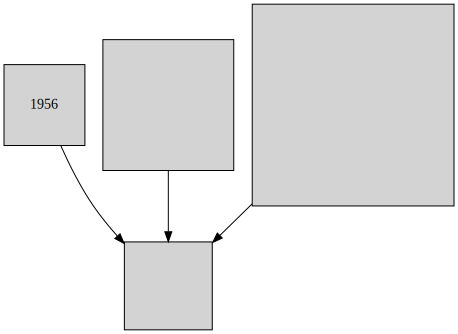

In [9]:
from graphviz import Digraph

def drawGraph(edgeList):
    G = Digraph(format='png')
    G.attr('node', shape='square', style='filled')
    for fr, to in edgeList:
        G.edge(fr, to)

    return G

def makeEdgeList(sentence):
    edgeList = []

    for i, chunk in enumerate(sentence):
        if chunk.dst != -1:
            fr = ''.join([morph.surface for morph in chunk.morphs])
            to = ''.join([morph.surface for morph in sentence[chunk.dst].morphs])
            edgeList.append([fr, to])

    return edgeList

target_sentence = article_chunks[8]
G = drawGraph(makeEdgeList(target_sentence))
G.render('44-graphs.png')
G

## 45. 動詞の格パターンの抽出

今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

> 作り出す	で は を

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）


In [10]:
import csv

with open("45-particles.tsv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f, delimiter="\t")
    
    for chunks in article_chunks:

        for chunk in chunks:            
            verb = None
            particles = []

            for morph in chunk.morphs:

                # chunk の中から動詞を抽出
                if morph.pos == '動詞':
                    verb = morph.base

                    # 動詞に掛かっている文節の助詞を抽出
                    for src in chunk.srcs:
                        for morph in chunks[src].morphs:

                            if morph.pos == "助詞":
                                particles.append(morph.surface)


            # verb が None でなければ write
            if verb != None:
                output = [verb] + [" ".join(sorted(particles))]
                writer.writerow(output)

# 以下の課題について未回答（わからぬ）
# このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

#     コーパス中で頻出する述語と格パターンの組み合わせ
#     「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

## 46. 動詞の格フレーム情報の抽出

45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．

> 作り出す	で は を	会議で ジョンマッカーシーは 用語を


In [11]:
import csv

with open("46-particles_and_terms.tsv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f, delimiter="\t")
    
    for chunks in article_chunks:
    
        for chunk in chunks:
            verb = None
            particles, terms = [], []

            for morph in chunk.morphs:

                # chunk の中から動詞を抽出
                if morph.pos == '動詞':
                    verb = morph.base

                    # 動詞に掛かっている文節の助詞を抽出
                    for src in chunk.srcs:
                        for index, morph in enumerate(chunks[src].morphs):

                            if morph.pos == "助詞":
                                particles.append(morph.surface)

                                # 項の出力
                                term = chunks[src].morphs[index-1].surface + particles[-1]
                                terms.append(term)

            # verb が None でなければ write
            if verb != None:

                # zipを使った２つのリストの同時ソート：
                # https://xvideos.hatenablog.com/entry/python_sort_multi_array
                if len(particles) > 0 and len(terms) > 0:
                    particles, terms = zip(*sorted(zip(particles, terms)))

                output = [verb] + [" ".join(particles)] + [" ".join(terms)]
                writer.writerow(output)


## 47. 機能動詞構文のマイニング

動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．

> 学習を行う	に を	元に 経験を


In [12]:
import csv

with open("47-predicates_and_terms.tsv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f, delimiter="\t")

    # chunksには一文に含まれる全ての文節が含まれる
    for chunks in article_chunks:

        # 述語の構成要素
        sahen_noun, wo_particle, verb = None, None, None

        # 述語
        predicate = None

        # chunkは1つの文節
        for chunk in chunks:
            particles, terms = [], []

            # morphは文節に含まれる形態素
            for morph in chunk.morphs:

                # サ変接続名詞を抽出
                if morph.pos == '名詞' and morph.pos1 == "サ変接続":
                    sahen_noun = morph.surface

                # サ変接続名詞の次に「を」があるか判定
                if sahen_noun != None and morph.pos == "助詞" and morph.surface == "を":
                    wo_particle = morph.surface

                # サ変接続名詞＋「を」の次に動詞があるか判定
                if sahen_noun != None and wo_particle != None and morph.pos == "動詞":
                    verb = morph.base

                    predicate = sahen_noun + wo_particle + verb

            # 述語に掛かっている文節の助詞を抽出
            if predicate != None:
                for src in chunk.srcs:
                    for index, morph in enumerate(chunks[src].morphs):

                        if morph.pos == "助詞":
                            particles.append(morph.surface)

                            # 項の出力
                            term = chunks[src].morphs[index-1].surface + particles[-1]
                            terms.append(term)

            # 述語（predicate）が None でなければ write
            if predicate != None and particles != []:

                # zipを使った２つのリストの同時ソート：
                # https://xvideos.hatenablog.com/entry/python_sort_multi_array
                if len(particles) > 0 and len(terms) > 0:
                    particles, terms = zip(*sorted(zip(particles, terms)))

                output = [predicate] + [" ".join(particles)] + [" ".join(terms)]
                writer.writerow(output)


## 48. 名詞から根へのパスの抽出

文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

> ジョンマッカーシーは -> 作り出した<br>
> AIに関する -> 最初の -> 会議で -> 作り出した<br>
> 最初の -> 会議で -> 作り出した<br>
> 会議で -> 作り出した<br>
> 人工知能という -> 用語を -> 作り出した<br>
> 用語を -> 作り出した

KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

> ジョンマッカーシーは -> 作り出した<br>
> ＡＩに -> 関する -> 会議で -> 作り出した<br>
> 会議で -> 作り出した<br>
> 人工知能と -> いう -> 用語を -> 作り出した<br>
> 用語を -> 作り出した


In [13]:
# chunksには一文に含まれる全ての文節が含まれる
for chunks in article_chunks:

    # chunkは1つの文節
    for chunk in chunks:
        
        # パスの要素
        elements = []

        # morphは文節に含まれる形態素
        for morph in chunk.morphs:

            # 名詞が含まれていれば形態素を結合し、残りの携帯その探索を止める
            if morph.pos == "名詞":
                elements.append("".join([morph.surface for morph in chunk.morphs]))
                break

        if elements != []:
            dst = chunk.dst
            
            while dst != -1:
                target_chunk = chunks[dst]
                elements.append("".join([morph.surface for morph in target_chunk.morphs]))

                dst = target_chunk.dst
            
            if len(elements) > 1:
                print(" -> ".join(elements))
            
            continue

人工知能 -> 語
（じんこうちのう、、 -> 語
AI -> 〈エーアイ〉）とは、 -> 語
〈エーアイ〉）とは、 -> 語
「『計算 -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
概念と -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
『コンピュータ -> （）』という -> 道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
道具を -> 用いて -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
『知能』を -> 研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
研究する -> 計算機科学 -> （）の -> 一分野」を -> 指す -> 語
計算機科学 -> （）の -> 一分野」を -> 指す -> 語
一分野」を -> 指す -> 語
「言語の -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
理解や -> 推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
推論、 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
知的行動を -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
人間に -> 代わって -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
コンピューターに -> 行わせる -> 技術」、または、 -> 研究分野」とも -> される
技術」、または、 -> 研究分野」とも -> される
「計算機 -> （コンピュータ）による -> 情報処理システムの -> 実現に関する -> 研究分野」とも -> される
（コンピ

## 49. 名詞間の係り受けパスの抽出

文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がi
とj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．

> Xは | Yに関する -> 最初の -> 会議で | 作り出した<br>
> Xは | Yの -> 会議で | 作り出した<br>
> Xは | Yで | 作り出した<br>
> Xは | Yという -> 用語を | 作り出した<br>
> Xは | Yを | 作り出した<br>
> Xに関する -> Yの<br>
> Xに関する -> 最初の -> Yで<br>
> Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した<br>
> Xに関する -> 最初の -> 会議で | Yを | 作り出した<br>
> Xの -> Yで<br>
> Xの -> 会議で | Yという -> 用語を | 作り出した<br>
> Xの -> 会議で | Yを | 作り出した<br>
> Xで | Yという -> 用語を | 作り出した<br>
> Xで | Yを | 作り出した<br>
> Xという -> Yを<br>

KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．

> Xは | Yに -> 関する -> 会議で | 作り出した。<br>
> Xは | Yで | 作り出した。<br>
> Xは | Yと -> いう -> 用語を | 作り出した。<br>
> Xは | Yを | 作り出した。<br>
> Xに -> 関する -> Yで<br>
> Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。<br>
> Xに -> 関する -> 会議で | Yを | 作り出した。<br>
> Xで | Yと -> いう -> 用語を | 作り出した。<br>
> Xで | Yを | 作り出した。<br>
> Xと -> いう -> Yを<br>
